## Data Mining and Machine Learning 
### Logistic Regression
###  Libraries: scikit-learn and h2o
#### Edgar Acuna
#### November 2021
#### Datasets: Toy example, Diabetes

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.estimators.glm   import H2OGeneralizedLinearEstimator
#h2o.connect()
#h2o.no_progress()
h2o.init(ip="localhost", port=54323)
import warnings
warnings.filterwarnings('ignore')

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O_cluster_uptime:,48 mins 11 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_eacun_xoj4qw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,38.89 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


### Example 1: Predicting the final grade in a class

In [19]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
databin=df[['E1','pass']]
print(databin.head())

    E1  pass
0   96     1
1   96     1
2  100     1
3   93     1
4   90     1


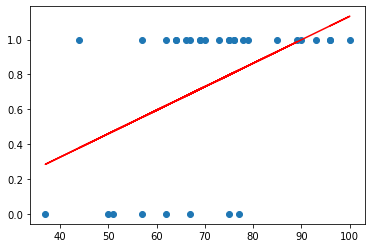

In [20]:
#Trazando la linea de regresion sobre el plot de puntos
x1=databin.iloc[:,0]
x2=databin.iloc[:,1]
plt.scatter(x1,x2)
plt.plot(x1, np.poly1d(np.polyfit(x1, x2, 1))(x1),color='red')

plt.show()

### Applying Logistic Regression to predict Final Grade. Use of sckikit-learn

In [21]:
#Applying Logistic Regression to predict Final Grade
X=df[['E1',"E2"]]
y3=df['pass']
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression(solver="newton-cg")
model = model.fit(X, y3)
print("Coeficientes del modelo", model.coef_)

Coeficientes del modelo [[0.84415919 0.5817652 ]]


In [22]:
#Accuracy
model.score(X,y3)

1.0

In [23]:
# Tasa de precision
pred = model.predict(X)
print(pred)
pred1=model.predict_proba(X)
print(pred1[0:5,:])
print(classification_report(y3, pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        24

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



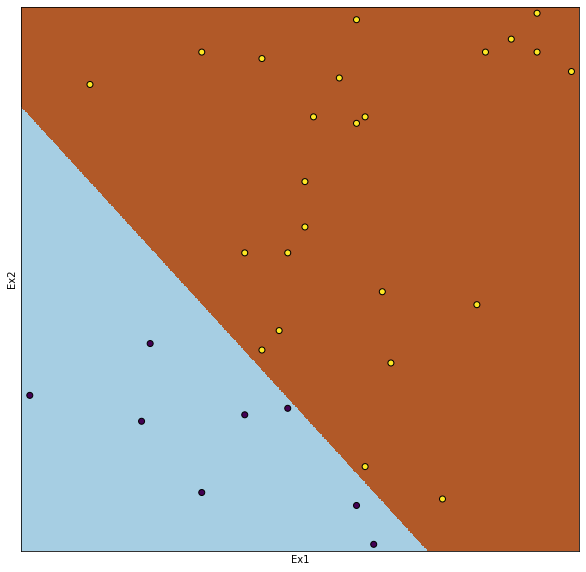

In [24]:
from matplotlib.colors import ListedColormap
logis = LogisticRegression(solver="newton-cg")
X1=df.iloc[:,0:2].to_numpy()
y1=df['pass'].to_numpy()
logis.fit(X1,y1)
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=logis.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y1, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Logistic Regression using library H2o

In [25]:
df1=h2o.H2OFrame(df)
myx=['E1','E2']
myy='Nota'
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True) #Lmbda es un parametro de regularizacion
glm_model.train(myx, myy, training_frame= df1)
y_pred=glm_model.predict(df1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [26]:
print((y_pred['predict']==df1['Nota']).sum()/len(df1))

1.0


### Example 2. Logistic Regression for Diabetes using sckit-learn

In [27]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#The response  variable must be binary (0,1)
y=data['class']-1
X=data.iloc[:,0:8]
#Haciendo la regresion logistica y calculando su precision
model = LogisticRegression()
model = model.fit(X, y)
print(model.coef_)

[[ 1.17252324e-01  3.35996755e-02 -1.40874200e-02 -1.27053477e-03
  -1.24031220e-03  7.72025216e-02  1.41904116e+00  1.00355163e-02]]


In [28]:
model.score(X,y)

0.7825520833333334

In [29]:
predictions = model.predict(X)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.57      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.75       768
weighted avg       0.78      0.78      0.77       768



Estimating the accuracy using 10-fold cross-validation

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)
scores
#Hallando la precision media y un intervalo de confianza 
print("CV Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

CV Accuracy: 0.775 (+/- 0.073)


### Logistic regression for Diabetes  using the H2o library

In [31]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy='C9'
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True)
glm_model.train(myx, myy, training_frame= diabetes)
y_pred=glm_model.predict(diabetes)
#print (y_pred['predict']==diabetes['C9']).sum()/float(len(diabetes))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [32]:
print((y_pred['predict']==diabetes['C9']).sum()/len(diabetes))

0.7669270833333334


Estimating the accuracy using 10-fold crossvalidation

In [33]:
model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True,nfolds=10)
model.train(myx, myy, training_frame= diabetes)
model.confusion_matrix

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1635798542589_42


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,8,8,5,py_5_sid_bdf7




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1527257557008024
RMSE: 0.39080142745491914
LogLoss: 0.47099308448839067
Null degrees of freedom: 767
Residual degrees of freedom: 759
Null deviance: 993.4839101388008
Residual deviance: 723.4453777741679
AIC: 741.4453777741679
AUC: 0.8393582089552238
AUCPR: 0.7295945336147411
Gini: 0.6787164179104477

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35438353580758675: 


,,1,2,Error,Rate
0,1,392.0,108.0,0.216,(108.0/500.0)
1,2,70.0,198.0,0.2612,(70.0/268.0)
2,Total,462.0,306.0,0.2318,(178.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.354384,0.689895,199.0
1,max f2,0.150764,0.801001,297.0
2,max f0point5,0.647587,0.710227,102.0
3,max accuracy,0.486768,0.785156,148.0
4,max precision,0.992589,1.000000,0.0
5,max recall,0.013685,1.000000,392.0
6,max specificity,0.992589,1.000000,0.0
7,max absolute_mcc,0.486768,0.510942,148.0
8,max min_per_class_accuracy,0.331064,0.753731,207.0
9,max mean_per_class_accuracy,0.354384,0.761403,199.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 27.29 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.568880,2.149254,2.149254,0.750000,0.667991,0.750000,0.667991,0.022388,0.022388,114.925373,114.925373,0.018388
1,2,0.020833,0.550826,0.358209,1.253731,0.125000,0.559291,0.437500,0.613641,0.003731,0.026119,-64.179104,25.373134,0.008119
2,3,0.031250,0.518522,1.432836,1.313433,0.500000,0.536097,0.458333,0.587793,0.014925,0.041045,43.283582,31.343284,0.015045
3,4,0.040365,0.477280,1.637527,1.386615,0.571429,0.490627,0.483871,0.565852,0.014925,0.055970,63.752665,38.661531,0.023970
4,5,0.050781,0.451476,1.432836,1.396096,0.500000,0.461079,0.487179,0.544360,0.014925,0.070896,43.283582,39.609644,0.030896
5,6,0.100260,0.382335,1.659073,1.525877,0.578947,0.409300,0.532468,0.477707,0.082090,0.152985,65.907306,52.587711,0.080985
6,7,0.151042,0.348819,1.396096,1.482244,0.487179,0.366186,0.517241,0.440213,0.070896,0.223881,39.609644,48.224395,0.111881
7,8,0.200521,0.326530,1.734485,1.544485,0.605263,0.337709,0.538961,0.414920,0.085821,0.309701,73.448547,54.448537,0.167701
8,9,0.300781,0.294392,1.079279,1.389417,0.376623,0.308918,0.484848,0.379586,0.108209,0.417910,7.927893,38.941655,0.179910
9,10,0.399740,0.267206,1.018068,1.297487,0.355263,0.280489,0.452769,0.355054,0.100746,0.518657,1.806756,29.748651,0.182657




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.15770842305121469
RMSE: 0.39712519820733444
LogLoss: 0.4853731827695013
Null degrees of freedom: 767
Residual degrees of freedom: 759
Null deviance: 994.5831075619548
Residual deviance: 745.533208733954
AIC: 763.533208733954
AUC: 0.8298805970149253
AUCPR: 0.7061840047884398
Gini: 0.6597611940298507

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31872484585060035: 


,,1,2,Error,Rate
0,1,374.0,126.0,0.252,(126.0/500.0)
1,2,61.0,207.0,0.2276,(61.0/268.0)
2,Total,435.0,333.0,0.2435,(187.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.318725,0.688852,209.0
1,max f2,0.169196,0.795311,293.0
2,max f0point5,0.544862,0.691794,127.0
3,max accuracy,0.544862,0.774740,127.0
4,max precision,0.992454,1.000000,0.0
5,max recall,0.010440,1.000000,396.0
6,max specificity,0.992454,1.000000,0.0
7,max absolute_mcc,0.338200,0.502705,202.0
8,max min_per_class_accuracy,0.335311,0.757463,203.0
9,max mean_per_class_accuracy,0.318725,0.760194,209.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 299.06 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,5.061033,1.791045,1.791045,0.625000,6.061520,0.625000,6.061520,0.018657,0.018657,79.104478,79.104478,0.012657
1,2,0.020833,4.162102,1.791045,1.791045,0.625000,4.690857,0.625000,5.376188,0.018657,0.037313,79.104478,79.104478,0.025313
2,3,0.031250,3.659630,1.074627,1.552239,0.375000,3.826942,0.541667,4.859773,0.011194,0.048507,7.462687,55.223881,0.026507
3,4,0.040365,3.517919,0.818763,1.386615,0.285714,3.553263,0.483871,4.564755,0.007463,0.055970,-18.123667,38.661531,0.023970
4,5,0.050781,3.438187,0.716418,1.249139,0.250000,3.477135,0.435897,4.341653,0.007463,0.063433,-28.358209,24.913892,0.019433
5,6,0.100260,3.295809,1.131186,1.190928,0.394737,3.365018,0.415584,3.859677,0.055970,0.119403,13.118617,19.092847,0.029403
6,7,0.151042,3.234588,1.102181,1.161091,0.384615,3.263404,0.405172,3.659206,0.055970,0.175373,10.218140,16.109110,0.037373
7,8,0.200521,3.184203,0.904949,1.097887,0.315789,3.210714,0.383117,3.548539,0.044776,0.220149,-9.505106,9.788719,0.030149
8,9,0.300781,3.096698,1.004846,1.066873,0.350649,3.140016,0.372294,3.412365,0.100746,0.320896,0.484590,6.687343,0.030896
9,10,0.399740,3.016327,0.942655,1.036122,0.328947,3.057139,0.361564,3.324426,0.093284,0.414179,-5.734485,3.612232,0.022179




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.770161,0.067616,0.658824,0.765432,0.684211,0.763889,0.851351,0.763158,0.757576,0.844156,0.863014,0.750000
1,auc,0.827476,0.061074,0.789128,0.823529,0.819355,0.784615,0.888112,0.863846,0.697314,0.895745,0.887279,0.825833
2,err,0.229839,0.067616,0.341176,0.234568,0.315789,0.236111,0.148649,0.236842,0.242424,0.155844,0.136986,0.250000
3,err_count,17.800000,6.033241,29.000000,19.000000,24.000000,17.000000,11.000000,18.000000,16.000000,12.000000,10.000000,22.000000
4,f0point5,0.671833,0.088558,0.570342,0.670103,0.617530,0.583333,0.754717,0.644330,0.638298,0.791139,0.826772,0.621762
5,f1,0.712904,0.069018,0.674157,0.732394,0.720930,0.622222,0.744186,0.735294,0.600000,0.806452,0.807692,0.685714
6,f2,0.769654,0.092912,0.824176,0.807453,0.865922,0.666667,0.733945,0.856164,0.566038,0.822368,0.789474,0.764331
7,lift_top_group,1.819157,1.592726,0.000000,0.000000,0.000000,3.600000,3.363636,2.923077,0.000000,2.566667,2.703704,3.034483
8,logloss,0.485123,0.063676,0.568771,0.500577,0.516495,0.480451,0.404091,0.448846,0.592752,0.410985,0.429445,0.498821
9,max_per_class_error,0.339027,0.123466,0.518518,0.294118,0.533333,0.300000,0.272727,0.340000,0.454545,0.166667,0.222222,0.288136



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-11-01 17:18:17,0.000 sec,0,496.741955,0.646799,,,,,,,
1,,2021-11-01 17:18:17,0.016 sec,1,370.890960,0.482931,,,,,,,
2,,2021-11-01 17:18:17,0.016 sec,2,362.029436,0.471392,,,,,,,
3,,2021-11-01 17:18:17,0.016 sec,3,361.723247,0.470994,,,,,,,
4,,2021-11-01 17:18:17,0.016 sec,4,361.722689,0.470993,,,,,,,
5,,2021-11-01 17:18:17,0.016 sec,5,361.722689,0.470993,0.390801,0.470993,0.327751,0.839358,0.729595,2.149254,0.231771



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C2,1.124276,1.000000,0.358147
1,C6,0.707217,0.629042,0.225289
2,C1,0.415072,0.369191,0.132224
3,C7,0.313165,0.278548,0.099761
4,C3,0.257346,0.228899,0.081980
5,C8,0.174863,0.155534,0.055704
6,C5,0.137336,0.122155,0.043749
7,C4,0.009874,0.008782,0.003145


<bound method H2OBinomialModel.confusion_matrix of >